# Show a tree

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

In [3]:
df_umbrella = pd.DataFrame(
    {
        'Chance of Rainy': [.1, .9, .3, .1,],
        'UV Index': [11, 1, 3, 2,],
        'Umbrella': [True, True, False, False, ],
    }
)

In [4]:
print(df_umbrella.to_string(index=False))

 Chance of Rainy  UV Index  Umbrella
             0.1        11      True
             0.9         1      True
             0.3         3     False
             0.1         2     False


In [5]:
feature_names = ['Chance of Rainy', 'UV Index']
target = 'Umbrella'

In [6]:
clf = DecisionTreeClassifier(
    # criterion='entropy',

).fit(
    df_umbrella[feature_names], df_umbrella[target]
)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


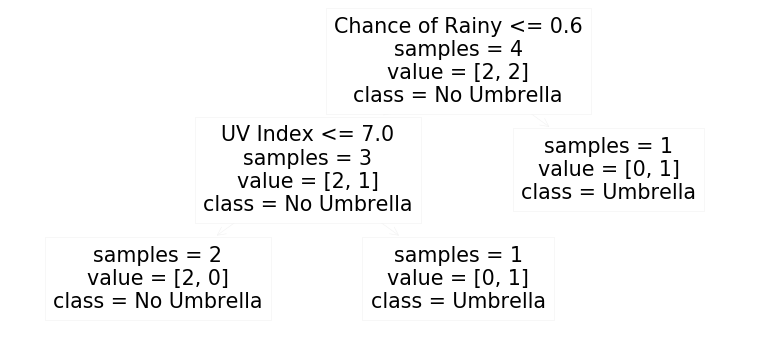

In [7]:
fig, ax = plt.subplots(figsize=(12, 6));

plot_tree(
    clf, 
    filled=False, 
    feature_names=feature_names, 
    class_names=['No Umbrella', 'Umbrella'],
    impurity=False,
    rotate=True,
    ax=ax,
)

fig.show()

In [8]:
print('Shall I take an umbrella with me?\n')
print(
    export_text(clf, feature_names=feature_names, spacing=3, decimals=1)
)

Shall I take an umbrella with me?

|--- Chance of Rainy <= 0.6
|   |--- UV Index <= 7.0
|   |   |--- class: False
|   |--- UV Index >  7.0
|   |   |--- class: True
|--- Chance of Rainy >  0.6
|   |--- class: True



### Tree to if-else

In [9]:
[feature_names[f] for f in clf.tree_.feature if f != -2]

['Chance of Rainy', 'UV Index']

In [10]:
[t for t in clf.tree_.threshold if t != -2]

[0.5999999940395355, 7.0]

In [11]:
clf.tree_.children_left

array([ 1,  2, -1, -1, -1])

In [12]:
# https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print( "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {" )
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print ("} else {")
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print( "}")
                else:
                        print ("return " + str(value[node][0][1]))

        recurse(left, right, threshold, features, 0)

In [13]:
get_code(clf, feature_names)

if ( Chance of Rainy <= 0.5999999940395355 ) {
if ( UV Index <= 7.0 ) {
return 0.0
} else {
return 1.0
}
} else {
return 1.0
}


# Iris Classification using Decision Trees

In [14]:
import pandas as pd
from sklearn import datasets

## Loading Dataset

In [27]:
iris = datasets.load_iris()

In [28]:
# Let's see what methods the dataset provideds
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [29]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [30]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [31]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [32]:
iris.data[:8]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2]])

In [33]:
iris.target[:8]

array([0, 0, 0, 0, 0, 0, 0, 0])

In [34]:
# It's customary to call a data frame, df
df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

In [35]:
df['target_names'] = df['target'].apply(lambda y: iris.target_names[y])

In [36]:
df.sample(n=6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
103,6.3,2.9,5.6,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa
82,5.8,2.7,3.9,1.2,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
112,6.8,3.0,5.5,2.1,2,virginica
51,6.4,3.2,4.5,1.5,1,versicolor


In [37]:
df.sample(n=6, random_state=42) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa


In [38]:
df.sample(n=6, random_state=42) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa


## Plot our classes

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


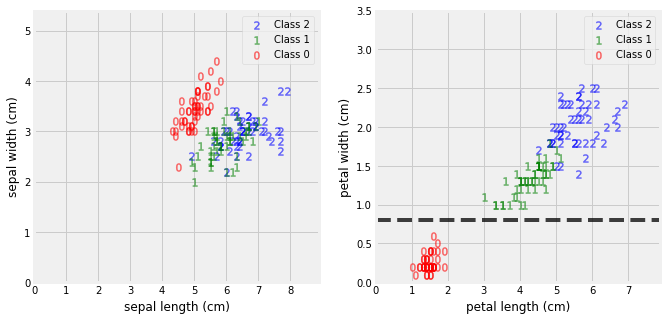

In [39]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig, axs = plt.subplots(1, 2, figsize=(10, 5));

h_label = 'sepal length (cm)'
v_label = 'sepal width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[0],
    )
    
axs[0].set_xlim(0, df[h_label].max() + 1)
axs[0].set_ylim(0, df[v_label].max() + 1)

h_label = 'petal length (cm)'
v_label = 'petal width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[1],
    )
    
axs[1].set_xlim(0, df[h_label].max() + 1)
axs[1].set_ylim(0, df[v_label].max() + 1)

axs[1].axhline(y=0.8, color='black', linestyle='--', alpha=0.75)

axs[0].legend()
axs[1].legend()
    
fig.show()

In [40]:
df['petal length x width (cm)'] = df['petal length (cm)'] * df['petal width (cm)']
df['sepal length x width (cm)'] = df['sepal length (cm)'] * df['sepal width (cm)']

df['petal length x sepal length (cm)'] = df['petal length (cm)'] * df['sepal length (cm)']
df['petal width x sepal width (cm)'] = df['petal width (cm)'] * df['sepal width (cm)']

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


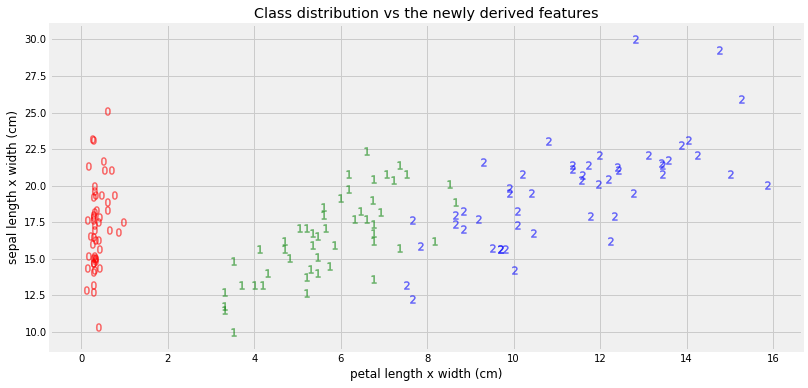

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        title='Class distribution vs the newly derived features',
        kind='scatter',
        x=h_label,
        y=v_label,
        color=['r', 'g', 'b'][c],
        # marker=['1', '2', '3'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        ax=ax,
    )
    
# ax.set_xlim(0, df[h_label].max() + 1)
# ax.set_ylim(0, df[v_label].max() + 1)
    
fig.show()

## Split Data

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=13)

In [306]:
print(df.shape[0], df_train.shape[0], df_test.shape[0])

150 105 45


In [307]:
df_train.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'target_names',
       'petal length x width (cm)', 'sepal length x width (cm)',
       'petal length x sepal length (cm)', 'petal width x sepal width (cm)'],
      dtype='object')

In [308]:
df_train['target']

109    2
39     0
93     1
42     0
54     1
      ..
126    2
98     1
16     0
74     1
82     1
Name: target, Length: 105, dtype: int64

## Train Classifier

In [332]:
from sklearn.tree import DecisionTreeClassifier

In [333]:
clf = DecisionTreeClassifier()

In [334]:
x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [335]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [346]:
y_test_pred = clf.predict(x_test)

In [347]:
from sklearn.metrics import accuracy_score

In [348]:
accuracy_score(y_test, y_test_pred)

0.9111111111111111

In [349]:
y_test.value_counts()

2    19
0    14
1    12
Name: target, dtype: int64

In [350]:
# Class 0: 12, class 1: 8, class 2: 18
13 + 16 + 16

45

In [351]:
df_train.shape[0] / (df_train.shape[0] + df_test.shape[0])

0.7

In [352]:
y_train_pred = clf.predict(x_train)
accuracy_score(y_train, y_train_pred)

1.0

In [353]:

pd.DataFrame(
    {
        'feature_names': iris.feature_names,
        'feature_importances': clf.feature_importances_
    }
).sort_values(
    'feature_importances', ascending=False
).set_index(
    'feature_names'
)

,feature_importances
feature_names,
petal width (cm),0.911864
sepal length (cm),0.051669
sepal width (cm),0.023119
petal length (cm),0.013348


In [354]:
[
    (feature, coeff) 
    for feature, coeff in zip(
        iris.feature_names,
        clf.feature_importances_
    )
]

[('sepal length (cm)', 0.051669262107547194),
 ('sepal width (cm)', 0.023119104905014273),
 ('petal length (cm)', 0.013347708996402925),
 ('petal width (cm)', 0.9118639239910356)]

In [355]:
print('Which species is it?\n')
print(
    export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1)
)

Which species is it?

|--- petal width (cm) <= 0.8
|   |--- class: 0
|--- petal width (cm) >  0.8
|   |--- petal width (cm) <= 1.8
|   |   |--- sepal length (cm) <= 7.1
|   |   |   |--- sepal length (cm) <= 5.0
|   |   |   |   |--- sepal width (cm) <= 2.5
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal width (cm) >  2.5
|   |   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  5.0
|   |   |   |   |--- sepal width (cm) <= 2.2
|   |   |   |   |   |--- petal width (cm) <= 1.2
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal width (cm) >  1.2
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  2.2
|   |   |   |   |   |--- class: 1
|   |   |--- sepal length (cm) >  7.1
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.8
|   |   |--- petal length (cm) <= 4.9
|   |   |   |--- sepal length (cm) <= 6.0
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  6.0
|   |   |   |   |--- class: 2
|   |   |---

In [356]:
clf.get_depth()

6

## Using derived features too

In [357]:
features_orig = iris.feature_names
# features_new = iris.feature_names + ['petal length x width (cm)', 'sepal length x width (cm)']
features_new = ['petal length x width (cm)', 'sepal length x width (cm)']

accuracy_scores_orig = []
accuracy_scores_new = []

for _ in range(500):
    
    df_train, df_test = train_test_split(df, test_size=0.3)
    
    x_train_orig = df_train[features_orig]
    x_test_orig  = df_test[features_orig]
    
    x_train_new = df_train[features_new]
    x_test_new  = df_test[features_new]

    y_train = df_train['target']
    y_test  = df_test['target']
    
    clf_orig = DecisionTreeClassifier(max_depth=2)
    clf_new = DecisionTreeClassifier(max_depth=2)

    clf_orig.fit(x_train_orig, y_train)
    clf_new.fit(x_train_new, y_train)
    
    y_pred_orig = clf_orig.predict(x_test_orig)
    y_pred_new = clf_new.predict(x_test_new)
    
    accuracy_scores_orig.append(round(accuracy_score(y_test, y_pred_orig), 3))
    accuracy_scores_new.append(round(accuracy_score(y_test, y_pred_new), 3))

accuracy_scores_orig = pd.Series(accuracy_scores_orig)
accuracy_scores_new = pd.Series(accuracy_scores_new)

In [358]:
print(
    'Accuracy Orig: {:.2} vs New: {:.2}'.format(
        accuracy_scores_orig.median(),
        accuracy_scores_new.median(),
    )
)

Accuracy Orig: 0.93 vs New: 0.96


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


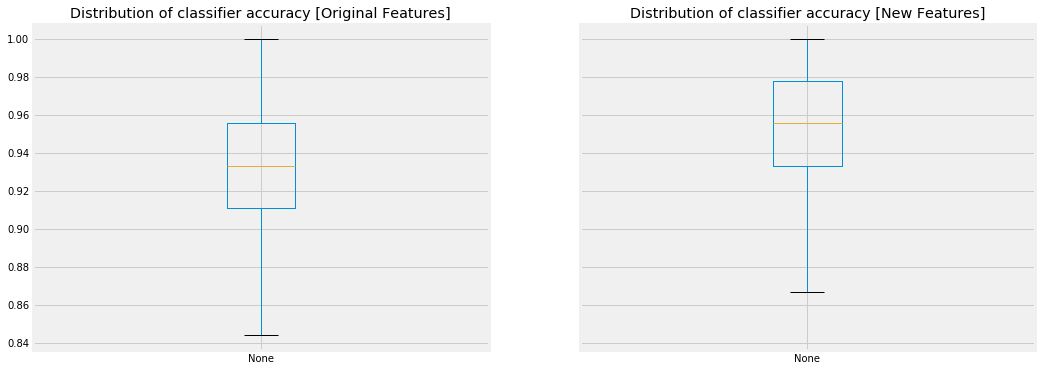

In [359]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True);

accuracy_scores_orig.plot(
    title='Distribution of classifier accuracy [Original Features]',
    kind='box',
    meanline=True,
    grid=True,
    ax=axs[0]
)

accuracy_scores_new.plot(
    title='Distribution of classifier accuracy [New Features]',
    kind='box',
    meanline=True,
    grid=True,
    ax=axs[1]
)

fig.show()

In [360]:
pd.DataFrame(
    {
        'feature_names': features_orig,
        'feature_importances': clf_orig.feature_importances_
    }
).sort_values(
    'feature_importances', ascending=False
).set_index(
    'feature_names'
)

,feature_importances
feature_names,
petal width (cm),1.0
sepal length (cm),0.0
sepal width (cm),0.0
petal length (cm),0.0


In [361]:
pd.DataFrame(
    {
        'feature_names': features_new,
        'feature_importances': clf_new.feature_importances_
    }
).sort_values(
    'feature_importances', ascending=False
).set_index(
    'feature_names'
)

,feature_importances
feature_names,
petal length x width (cm),1.0
sepal length x width (cm),0.0


In [362]:
print('Which species is it? [Original]\n')
print(
    export_text(clf_orig, feature_names=features_orig, spacing=3, decimals=1)
)

print('Which species is it? [New]\n')
print(
    export_text(clf_new, feature_names=features_new, spacing=3, decimals=1)
)

Which species is it? [Original]

|--- petal width (cm) <= 0.8
|   |--- class: 0
|--- petal width (cm) >  0.8
|   |--- petal width (cm) <= 1.8
|   |   |--- class: 1
|   |--- petal width (cm) >  1.8
|   |   |--- class: 2

Which species is it? [New]

|--- petal length x width (cm) <= 2.1
|   |--- class: 0
|--- petal length x width (cm) >  2.1
|   |--- petal length x width (cm) <= 7.6
|   |   |--- class: 1
|   |--- petal length x width (cm) >  7.6
|   |   |--- class: 2



## Small data, accuracy varies

In [365]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

accuracy_scores = []

for _ in range(100):
    
    df_train, df_test = train_test_split(df, test_size=0.3)
    
    x_train = df_train[iris.feature_names]
    x_test  = df_test[iris.feature_names]

    y_train = df_train['target']
    y_test  = df_test['target']
    
    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores = pd.Series(accuracy_scores)

In [366]:
accuracy_scores.describe(percentiles=[0.05, 0.95])

count    100.000000
mean       0.946980
std        0.032946
min        0.822000
5%         0.889000
50%        0.956000
95%        1.000000
max        1.000000
dtype: float64

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


Average Score: 0.947 [5th percentile: 0.889 & 95th percentile: 1.0]


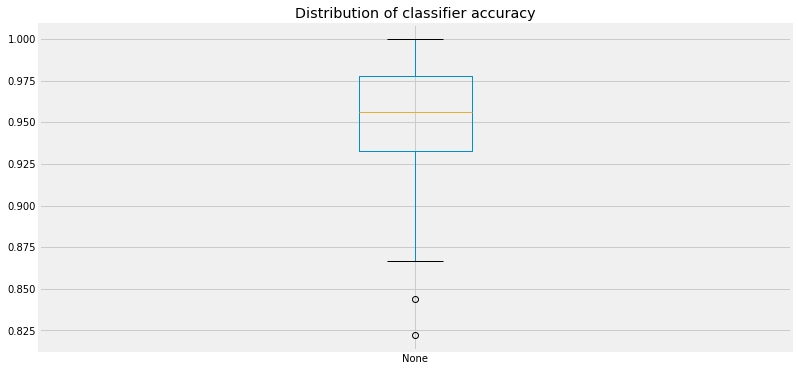

In [367]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box',
    ax=ax
)

fig.show()

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95),
    )
)



## Shuffle Split

In [525]:
import pandas as pd

from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier

accuracy_scores = []

rs = ShuffleSplit(n_splits=100, test_size=0.3)

for train_index, test_index in rs.split(df):
    
    x_train = df.loc[train_index, iris.feature_names]
    x_test  = df.loc[test_index, iris.feature_names]

    y_train = df.loc[train_index, 'target']
    y_test  = df.loc[test_index, 'target']
    
    clf = DecisionTreeClassifier()
    
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores = pd.Series(accuracy_scores)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


Average Score: 0.943 [5th percentile: 0.889 & 95th percentile: 0.978]


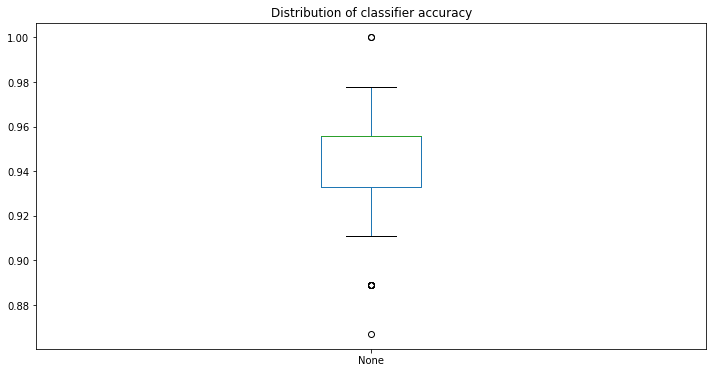

In [526]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box',
    ax=ax
)

fig.show()

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95),
    )
)

In [536]:
import pandas as pd

from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100, test_size=0.3)

x = df[iris.feature_names]
y = df['target']

cv_results = cross_validate(
    clf, x, y, cv=rs, scoring='accuracy'
)

accuracy_scores = pd.Series(cv_results['test_score'])

In [537]:
accuracy_scores.mean() # 0.9402222222222224

0.948222222222222

Average Score: 0.944 [5th percentile: 0.889 & 95th percentile: 0.978]


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


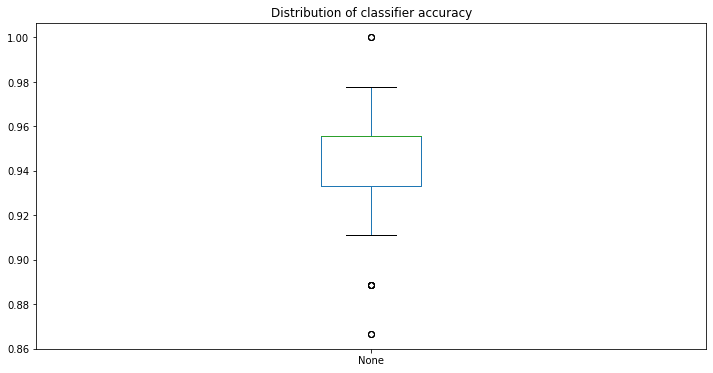

In [334]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6));

accuracy_scores.plot(
    title='Distribution of classifier accuracy',
    kind='box',
    ax=ax
)

fig.show()

print(
    'Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(.05),
        accuracy_scores.quantile(.95),
    )
)

## Hyper parameters selections

In [335]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

df_train, df_test = train_test_split(df, test_size=0.25)

x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']


for max_depth in [1, 2, 3, 4]:

    clf = DecisionTreeClassifier(max_depth=max_depth)
    rs = ShuffleSplit(n_splits=20, test_size=0.25)

    cv_results = cross_validate(
        clf, x_train, y_train, cv=rs, scoring='accuracy'
    )

    accuracy_scores = pd.Series(cv_results['test_score'])    
    print(
        '@ max_depth = {}: accuracy_scores: {}~{}'.format(
            max_depth, 
            accuracy_scores.quantile(.1).round(3), 
            accuracy_scores.quantile(.9).round(3)
        )
    )
    
    

@ max_depth = 1: accuracy_scores: 0.529~0.646
@ max_depth = 2: accuracy_scores: 0.889~1.0
@ max_depth = 3: accuracy_scores: 0.893~0.964
@ max_depth = 4: accuracy_scores: 0.893~1.0


In [336]:
for max_depth in [1, 2, 3, 4]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)
    print(
        '@ max_depth = {}: test accuracy: {}'.format(
            max_depth, round(accuracy_score(y_test, y_test_pred), 3)
        )
    )

@ max_depth = 1: test accuracy: 0.632
@ max_depth = 2: test accuracy: 0.947
@ max_depth = 3: test accuracy: 0.974
@ max_depth = 4: test accuracy: 0.947


## K-Fold Cross Validation

- Calculating any metric varies a lot, especially with small data
- To set model hyper prameters, we need to even split training further into training and devlopment set
- Here comes cross validation for the training set
- Once we know best hyper parameters, we apply them on the test set 

Cross Validation:
https://scikit-learn.org/stable/modules/cross_validation.html

Cross Validation + Parameters Search:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [337]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

def cross_validate(x_train, y_train, max_depth):

    # Do not worry if this code is not very clear, it can replaced by cross_val_score
    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
    
    accuracy_scores = []
    
    kf = KFold(n_splits=5)
    
    for train_index, test_index in kf.split(x_train):
        
        x_train_train, x_train_eval = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_train, y_train_eval = y_train.iloc[train_index], y_train.iloc[test_index]
        
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(x_train_train, y_train_train)
        y_train_eval_pred = clf.predict(x_train_eval)
        
        accuracy_scores.append(
            accuracy_score(y_train_eval, y_train_eval_pred)
        )
        
    accuracy_scores = pd.Series(accuracy_scores)
    confidence_interval_min = accuracy_scores.mean() - 1.645 * accuracy_scores.sem()
    confidence_interval_max = accuracy_scores.mean() + 1.645 * accuracy_scores.sem()
    return (confidence_interval_min, confidence_interval_max)
    
        
def compare_multiple_max_depths(x_train, y_train, max_depths):
    
    # This and the above combined = GridSearchCV
    
    for max_depth in max_depths:
        
        confidence_interval_min, confidence_interval_max = cross_validate(x_train, y_train, max_depth)
        
        print(f'Accuracy @ max_depth={max_depth}: {confidence_interval_min:.2%} ~ {confidence_interval_max:.2%}')
        
        
cross_validate(x_train, y_train, max_depth=4)
compare_multiple_max_depths(x_train, y_train, max_depths=[2, 3, 4, 9, 15, ])

Accuracy @ max_depth=2: 91.65% ~ 99.49%
Accuracy @ max_depth=3: 91.65% ~ 99.49%
Accuracy @ max_depth=4: 90.21% ~ 97.46%
Accuracy @ max_depth=9: 89.27% ~ 96.58%
Accuracy @ max_depth=15: 90.45% ~ 98.88%


In [338]:
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.2%}')

Accuracy: 94.74%


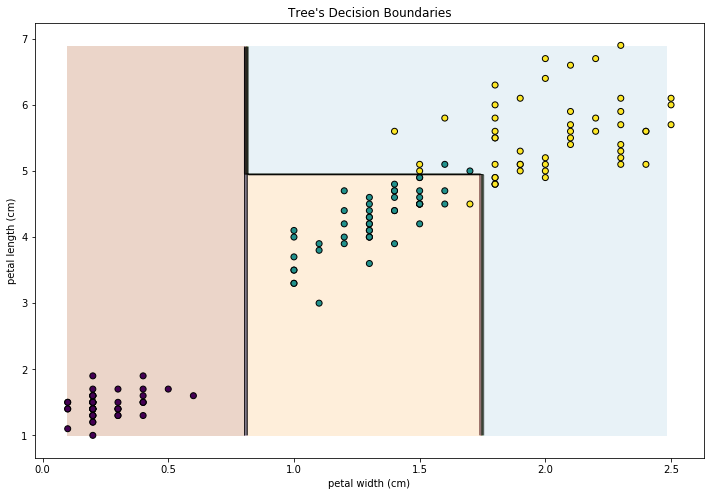

In [543]:
# http://www.cse.chalmers.se/~richajo/dit866/lectures/l3/Plotting%20decision%20boundaries.html

def plot_decision_boundary(clf, x, y):
    
    feature_names = x.columns
    x, y = x.values, y.values
    
    x_min, x_max = x[:,0].min(), x[:,0].max()
    y_min, y_max = x[:,1].min(), x[:,1].max()
    
    step = 0.02
    
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, step),
        np.arange(y_min, y_max, step)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12,8))
    plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    # plt.scatter(x[:,0], x[:,1], c=y, cmap='Paired_r', edgecolors='k')
    plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
    plt.title("Tree's Decision Boundaries")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    
    
x = df[['petal width (cm)', 'petal length (cm)']]
y = df['target']

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x, y)

plot_decision_boundary(clf, x, y)

In [375]:
artificial_data['petal length (cm)']

0    2.426786
1    3.647371
2    4.223774
3    5.472517
4    3.696231
5    1.008808
6    1.183805
7    1.247862
8    6.783876
9    4.365026
Name: petal length (cm), dtype: float64

In [374]:
np.meshgrid(artificial_data['petal length (cm)'], artificial_data['petal width (cm)'])

[array([[2.42678591, 3.64737136, 4.2237739 , 5.47251681, 3.69623087,
         1.00880827, 1.18380467, 1.24786181, 6.78387616, 4.36502626],
        [2.42678591, 3.64737136, 4.2237739 , 5.47251681, 3.69623087,
         1.00880827, 1.18380467, 1.24786181, 6.78387616, 4.36502626],
        [2.42678591, 3.64737136, 4.2237739 , 5.47251681, 3.69623087,
         1.00880827, 1.18380467, 1.24786181, 6.78387616, 4.36502626],
        [2.42678591, 3.64737136, 4.2237739 , 5.47251681, 3.69623087,
         1.00880827, 1.18380467, 1.24786181, 6.78387616, 4.36502626],
        [2.42678591, 3.64737136, 4.2237739 , 5.47251681, 3.69623087,
         1.00880827, 1.18380467, 1.24786181, 6.78387616, 4.36502626],
        [2.42678591, 3.64737136, 4.2237739 , 5.47251681, 3.69623087,
         1.00880827, 1.18380467, 1.24786181, 6.78387616, 4.36502626],
        [2.42678591, 3.64737136, 4.2237739 , 5.47251681, 3.69623087,
         1.00880827, 1.18380467, 1.24786181, 6.78387616, 4.36502626],
        [2.42678591, 3.6473

In [362]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return plt

<module 'matplotlib.pyplot' from '/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/matplotlib/pyplot.py'>

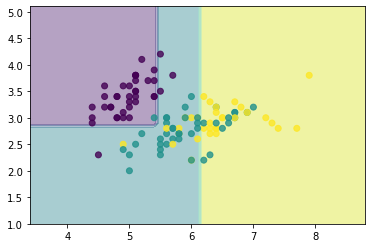

In [367]:
df_train, df_test = train_test_split(df, test_size=0.25)

x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']


plot_decision_boundaries(x_train.values, y_train.values, DecisionTreeClassifier, max_depth=2)